In [42]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

In [43]:
slide_df = pd.read_csv('/Users/emilyfryer/Documents/Current_analysis/automated_results/202007_Data.csv')

In [44]:
slide_df.rename(columns={'OP' : 'CT Media', 'chemotaxis_index': 'Chemotaxis Index'}, inplace=True)

In [59]:
slide_df

,Unnamed: 0,Well_id,Plate_id,Total_Worms,Bin#,Chemotaxis Index,centroid_x,centroid_y,Compound,CT Media
0,SUG_20200718_fin002,P,5,89,9,-0.236842,1957.111630,624.170260,(+)Limonene,CB
1,SUG_20200718_fin002,Q,5,61,9,0.296296,1545.775625,570.179424,(+)Limonene,CB
2,SUG_20200718_fin002,R,5,68,9,0.118644,1667.415704,612.006007,(+)Limonene,CB
3,SUG_20200718_fin002,S,5,95,9,0.283951,1502.189851,527.771786,(+)Limonene,CB
4,SUG_20200718_fin001,P,1,71,9,-0.454545,2235.843128,706.594474,1-octanone,CB
5,SUG_20200718_fin001,Q,1,41,9,0.470588,1445.795871,694.749919,Ethanol,CB
6,SUG_20200718_fin001,R,1,37,9,1.000000,820.468428,566.114502,Isoamyl Alcohol,CB
7,SUG_20200718_fin001,S,1,40,9,0.947368,894.931803,538.400773,Ethanol,CB
8,SUG_20200718_fin001,P,2,28,9,-0.777778,2448.561934,676.370660,Carvone,CB
9,SUG_20200718_fin001,Q,2,49,9,0.565217,1240.413833,682.264782,Ethanol,CB


In [46]:
def rep_val(val):
    if val == 0:
        return 'CB'
    else:
        return 'CB/OP'

In [47]:
slide_df['CT Media'] = slide_df['CT Media'].apply(rep_val)

In [49]:
analyis = slide_df.drop(slide_df.index[:4])

In [10]:
analyis.head()

,Unnamed: 0,Well_id,Plate_id,Total_Worms,Bin#,Chemotaxis Index,centroid_x,centroid_y,Compound,CT Media
4,SUG_20200718_fin001,P,1,71,9,-0.454545,2235.843128,706.594474,1-octanone,CB
5,SUG_20200718_fin001,Q,1,41,9,0.470588,1445.795871,694.749919,Ethanol,CB
6,SUG_20200718_fin001,R,1,37,9,1.000000,820.468428,566.114502,Isoamyl Alcohol,CB
7,SUG_20200718_fin001,S,1,40,9,0.947368,894.931803,538.400773,Ethanol,CB
8,SUG_20200718_fin001,P,2,28,9,-0.777778,2448.561934,676.370660,Carvone,CB


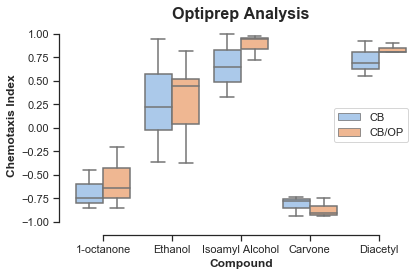

In [40]:
sns.set(style="ticks", palette="pastel")



# Draw a nested boxplot to show bills by day and time
fig = sns.boxplot(x="Compound", y="Chemotaxis Index",
            hue="CT Media", 
            data=analyis)
sns.despine(offset=10, trim=True)
fig.set_xlabel('Compound', fontsize='12', fontweight='bold')
fig.set_ylabel('Chemotaxis Index', fontsize='12', fontweight='bold')
plt.legend(loc='center right')
plt.title('Optiprep Analysis', fontweight='bold', fontsize='16')
plt.tight_layout()
plt.savefig('July_analysis.png')

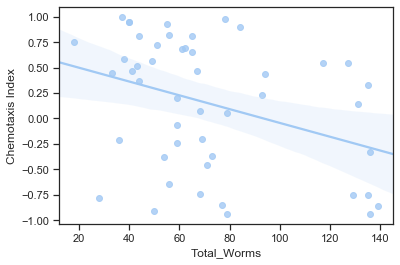

In [50]:

ax = sns.regplot(x="Total_Worms", y="Chemotaxis Index", data=analyis)


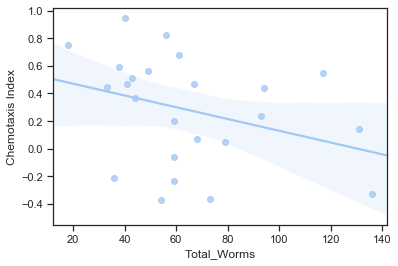

In [56]:
ethanol = analyis.loc[analyis['Compound'] == 'Ethanol']
sns.regplot(x="Total_Worms", y="Chemotaxis Index", data=ethanol)

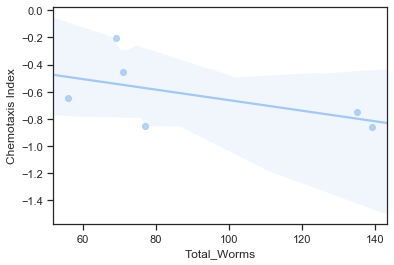

In [57]:
octanone = analyis.loc[analyis['Compound'] == '1-octanone']
sns.regplot(x="Total_Worms", y="Chemotaxis Index", data=octanone)

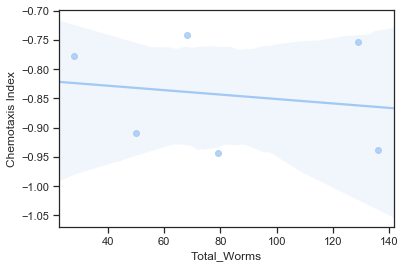

In [58]:
carvone = analyis.loc[analyis['Compound'] == 'Carvone']
sns.regplot(x="Total_Worms", y="Chemotaxis Index", data=carvone)

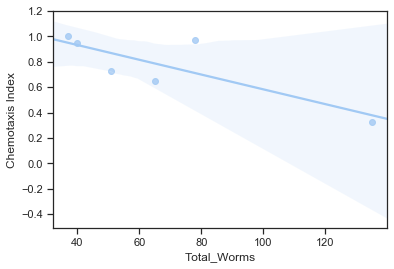

In [60]:
isoamyl = analyis.loc[analyis['Compound'] == 'Isoamyl Alcohol']
sns.regplot(x="Total_Worms", y="Chemotaxis Index", data=isoamyl)

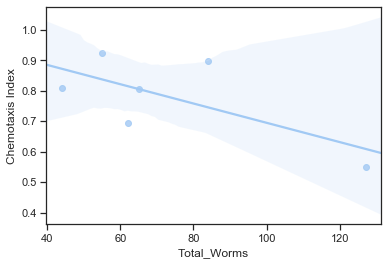

In [61]:
diacetyl = analyis.loc[analyis['Compound'] == 'Diacetyl']
sns.regplot(x="Total_Worms", y="Chemotaxis Index", data=diacetyl)

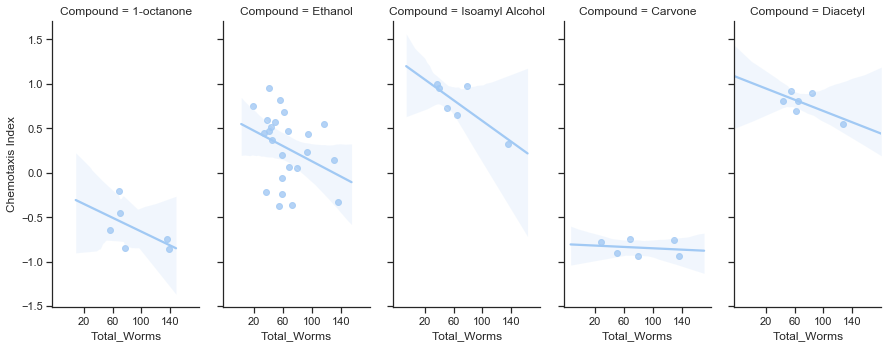

In [72]:
sns.set(style="ticks", palette="pastel")
sns.lmplot(x="Total_Worms", y="Chemotaxis Index", col="Compound", data=analyis,
           aspect=.5,);
plt.xticks([20,60,100,140])
plt.tight_layout()
plt.savefig('202007_allCompounds.pdf')

In [73]:
ethanol

,Unnamed: 0,Well_id,Plate_id,Total_Worms,Bin#,Chemotaxis Index,centroid_x,centroid_y,Compound,CT Media
5,SUG_20200718_fin001,Q,1,41,9,0.470588,1445.795871,694.749919,Ethanol,CB
7,SUG_20200718_fin001,S,1,40,9,0.947368,894.931803,538.400773,Ethanol,CB
9,SUG_20200718_fin001,Q,2,49,9,0.565217,1240.413833,682.264782,Ethanol,CB
11,SUG_20200718_fin001,S,2,38,9,0.588235,1311.537286,601.020839,Ethanol,CB
13,SUG_20200718_fin001,Q,3,54,9,-0.375000,2147.124925,644.214955,Ethanol,CB/OP
15,SUG_20200718_fin001,S,3,43,9,0.513514,1345.136475,519.309590,Ethanol,CB/OP
17,SUG_20200718_fin001,Q,4,94,9,0.439024,1436.268640,602.594275,Ethanol,CB/OP
19,SUG_20200718_fin001,S,4,117,9,0.544554,1384.514977,604.531751,Ethanol,CB/OP
21,SUG_20200721_fin001,Q,1,59,9,-0.236364,1838.708229,642.281149,Ethanol,CB
23,SUG_20200721_fin001,S,1,61,9,0.678571,1136.118220,532.917200,Ethanol,CB
